In [1]:
%matplotlib inline

import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.config import FIG_DIR, DIARY_DIR

In [2]:
figure_data_file = os.path.join(FIG_DIR, 'fig_3_data.csv')
figure_name = os.path.join(FIG_DIR, 'paper_fig_3.png')

if not os.path.exists(figure_data_file):
    input_data = {}
    data_files = [f for f in os.listdir(DIARY_DIR) if os.path.isfile(os.path.join(DIARY_DIR, f))]
    for data_file in data_files:
            input_data.update({data_file : pd.read_csv(os.path.join(DIARY_DIR, data_file))})
    number_days = [len(user_df.columns) for user_df in input_data.values() ]
    number_days = pd.Series(number_days)
    number_days.name = "n_days"
    number_days.to_csv(figure_data_file, index=False)

# Histogram of number of recording days

In [5]:
def plot_fig3(data, figure_name=figure_name, trancation=True, change_default_color='black'):    
    plt.rc('pdf', fonttype=42)
    sns.set(style="ticks")
    sns.set_context('paper', font_scale=1.3)
    plt.subplots(figsize=(6, 3))
        
    bins = [i_bin - 0.5 for i_bin in range(60)]
    data_series = data.iloc[:, 0] # Extract data series once
    
    if trancation:
        # Note: This truncation logic modifies the underlying data Series (data is passed by reference)
        data[data > 50] = data[data > 50] - 25
    
    if change_default_color:
        # FIX 1: Use histplot instead of deprecated distplot
        ax = sns.histplot(x=data_series, bins=bins, kde=False, color='black')
    else:
        ax = sns.histplot(data=data, bins=bins, shrink=0.9)
    
    if trancation:
        ax.set_xlim(xmin=-0.01, xmax = 35.1)
        ax.set_ylim(ymin=-0.01, ymax = 25.1)
        
        # FIX 2: Set the tick positions (set_xticks) before setting the labels (set_xticklabels)
        tick_positions = [0, 5, 10, 15, 20, 25, 30, 35]
        tick_labels = [0, 5, 10, 15, 20, 50, 55, 60]
        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels)

        # FAKE BROKEN AXES
        xpos = 22.5
        ypos = plt.gca().get_ylim()[0]
        plt.scatter(xpos, ypos-2.25, color='white', marker='s', s=80, clip_on=False, zorder=100)
        plt.text(xpos, -2.25, r'//', zorder=101, horizontalalignment='center', verticalalignment='center')
    else:
        ax.set_xlim(xmin=0, xmax = 60)
        ax.set_ylim(ymin=0, ymax = 25)
        
    ax.grid(ls="dotted")
    ax.set_ylabel("Number of participants")
    ax.set_xlabel("Number of recording days")
    
    sns.despine(offset=10, trim=True)
    plt.legend([],[], frameon=False)
    plt.tight_layout()
    plt.savefig(figure_name, dpi=200, transparent=False, bbox_inches='tight', pad_inches=0.0)
    plt.show()

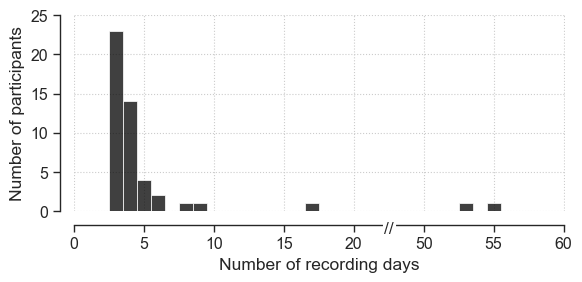

In [7]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

data = pd.read_csv(figure_data_file)
plot_fig3(data)